In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score



In [40]:
# Load the datasets
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prevalence-by-mental-and-substance-use-disorder.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mental-and-substance-use-as-share-of-disease (1).csv")

In [79]:
# dataset 1
df1.head()


,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [78]:
# dataset 2
df2.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [66]:
# Merge the datasets
data = pd.merge(df1, df2)
data.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


In [67]:
# Drop unnecessary columns
data.drop('Code', axis=1, inplace=True)

In [69]:
data.size,data.shape

(68400, (6840, 10))

In [68]:
# Rename columns
data.columns = ['Country', 'Year', 'Schizophrenia', 'Bipolar_disorder', 'Eating_disorder', 'Anxiety', 'Drug_usage',
               'Depression', 'Alcohol', 'Mental_fitness']


In [70]:
data.head()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


## **EXPLORATORY ANALYSIS**

[]

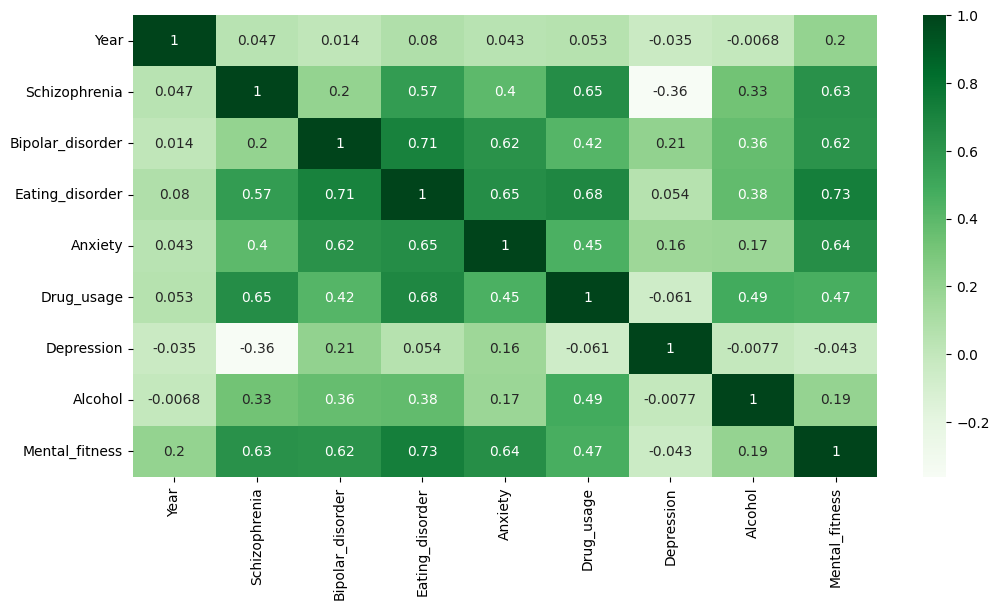

In [44]:
# Visualize the correlations
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.plot()


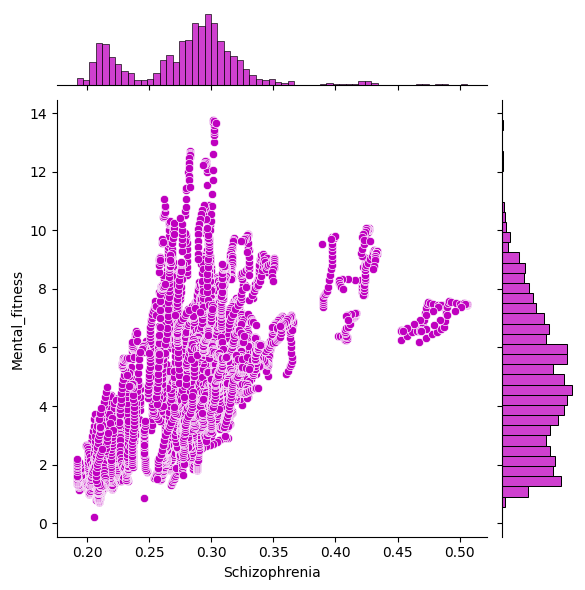

In [71]:
sns. jointplot( x ='Schizophrenia', y ='Mental_fitness',data = data, color='m')
plt.show()

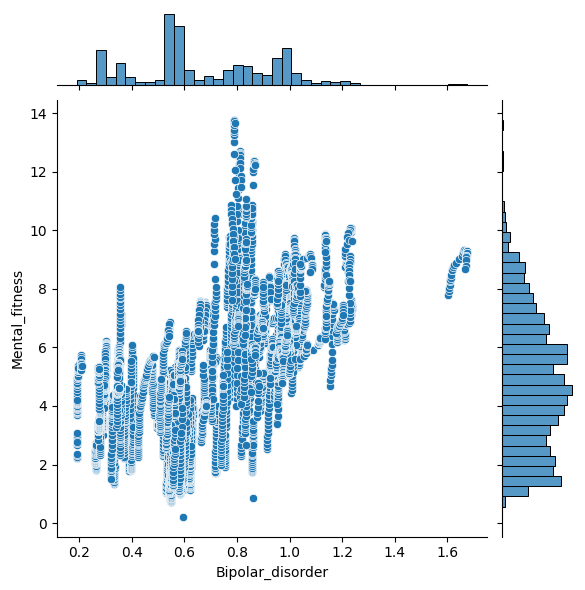

In [73]:
sns.jointplot(x='Bipolar_disorder', y='Mental_fitness', data=data,  cmap='blue')
plt.show()

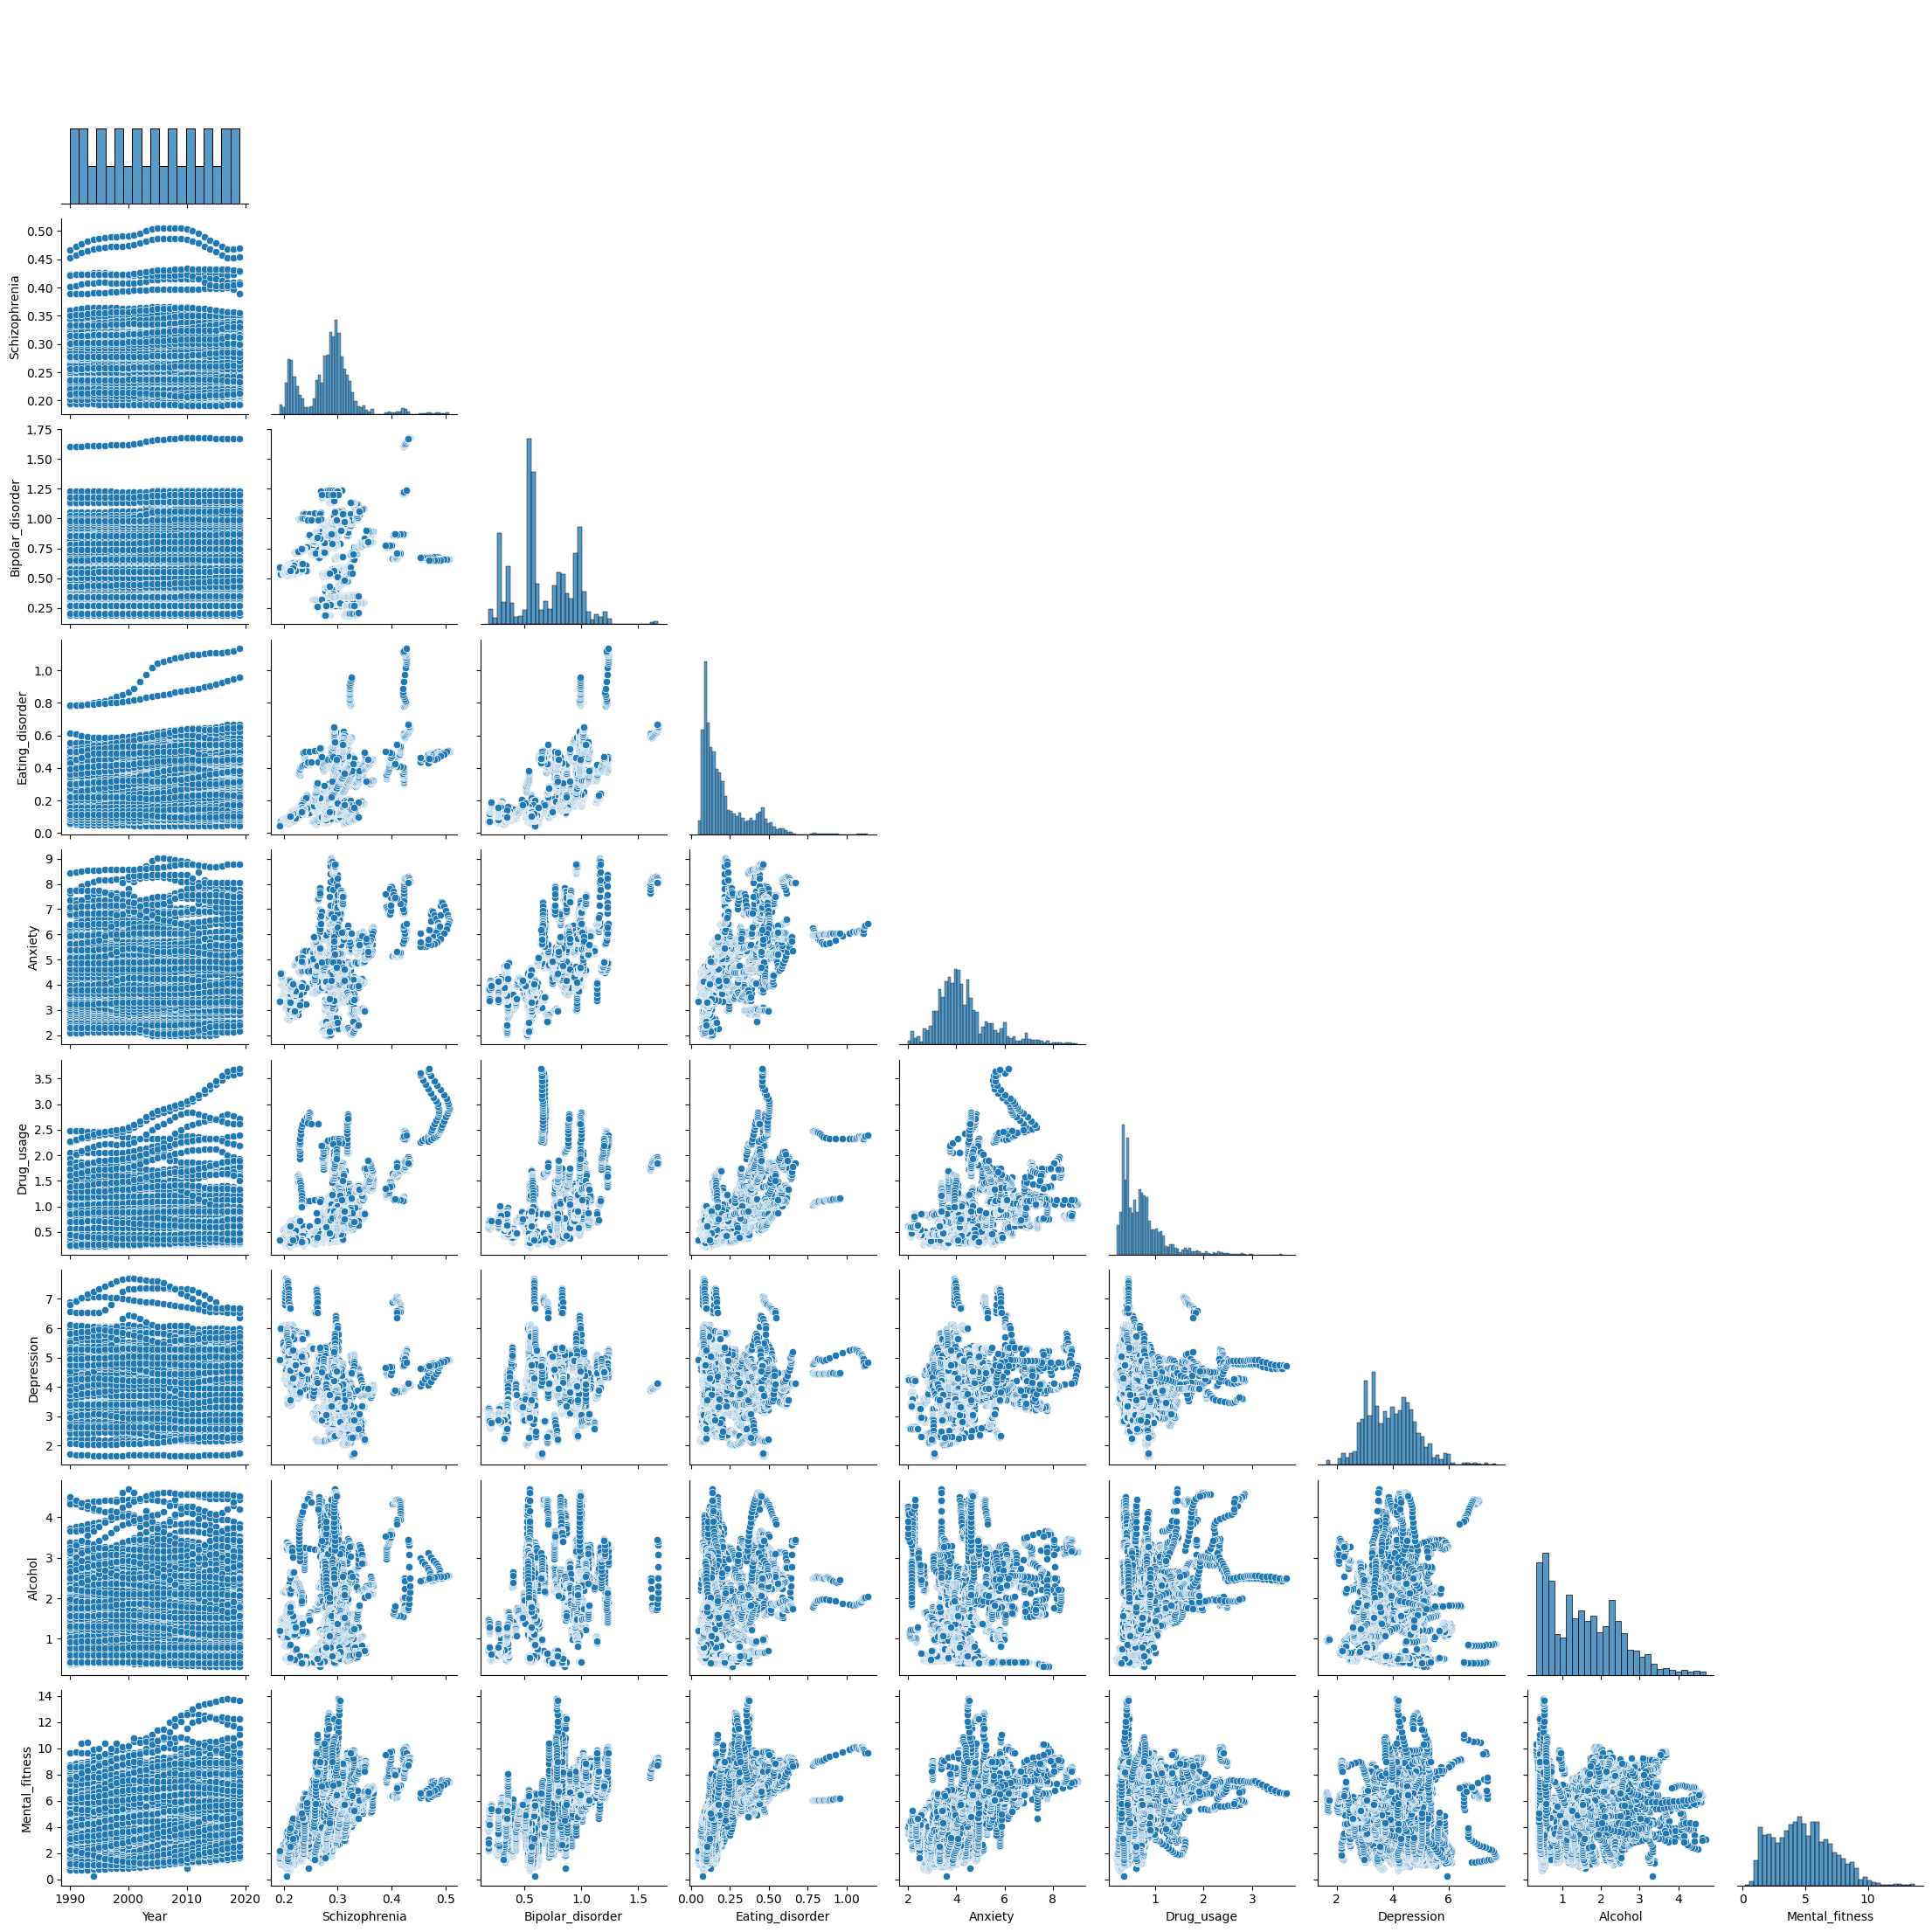

In [45]:
# Visualize pairwise relationships
sns.pairplot(data, corner=True)
plt.show()

In [75]:
fig=px.bar(data.head(10),x='Year',y='Mental_fitness',color='Year',template='ggplot2')
fig.show()

In [82]:
mean = data['Mental_fitness'].mean()
mean

4.8180618117506135

In [46]:
# Encode non-numeric labels
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [47]:
# Split the data into training and testing sets
X = data.drop('Mental_fitness', axis=1)
y = data['Mental_fitness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

 **LINEAR REGRESSION**

In [ ]:
# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Model evaluation for training set
y_train_pred = lr.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
print("Linear Regression model performance for training set:")
print("MSE: ", mse_train)
print("RMSE: ", rmse_train)
print("R2 score: ", r2_train)

Linear Regression model performance for training set:
MSE:  1.389959372405798
RMSE:  1.1789653821914357
R2 score:  0.7413245790025275


 **RANDOM FOREST REGRESSOR**

In [ ]:
# Train the Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Model evaluation for training set
y_train_pred = rf.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
print("\nRandom Forest Regressor model performance for training set:")
print("MSE: ", mse_train)
print("RMSE: ", rmse_train)
print("R2 score: ", r2_train)


Random Forest Regressor model performance for training set:
MSE:  0.005315834889083028
RMSE:  0.07290977224681906
R2 score:  0.9990107078989607


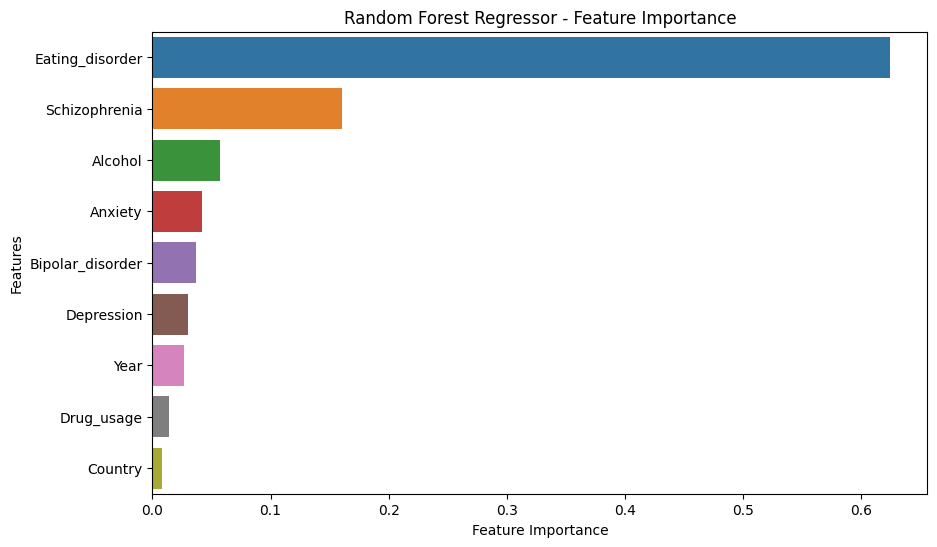

In [ ]:
# Feature importance analysis
importance = rf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_features = feature_names[sorted_indices]
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Regressor - Feature Importance")
plt.show()


In [ ]:
# Model evaluation for testing set (Linear Regression)
y_test_pred = lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
print("\nLinear Regression model performance for testing set:")
print("MSE: ", mse_test)
print("RMSE: ", rmse_test)
print("R2 score: ", r2_test)



Linear Regression model performance for testing set:
MSE:  1.1357545319272384
RMSE:  1.0657178481789813
R2 score:  0.7638974087055272


In [ ]:
# Model evaluation for testing set (Random Forest Regressor)
y_test_pred = rf.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
print("\nRandom Forest Regressor model performance for testing set:")
print("MSE: ", mse_test)
print("RMSE: ", rmse_test)
print("R2 score: ", r2_test)


Random Forest Regressor model performance for testing set:
MSE:  0.031695445935532716
RMSE:  0.17803214860112404
R2 score:  0.9934110965818338


In [ ]:

# Perform cross-validation for Linear Regression
lr_cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print("Cross-validation scores for Linear Regression:")
print(lr_cv_scores)
print("Average R2 score: ", np.mean(lr_cv_scores))


Cross-validation scores for Linear Regression:
[0.74607381 0.8325051  0.66599066 0.72407739 0.68253346]
Average R2 score:  0.73023608278296


In [ ]:
# Perform cross-validation for Random Forest Regressor
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("\nCross-validation scores for Random Forest Regressor:")
print(rf_cv_scores)
print("Average R2 score: ", np.mean(rf_cv_scores))


Cross-validation scores for Random Forest Regressor:
[0.84277896 0.76689593 0.72493144 0.8156867  0.81555579]
Average R2 score:  0.7931697638058217


In [ ]:
# Feature importance for Random Forest Regressor
feature_importance = rf.feature_importances_
feature_names = X.columns


In [ ]:
# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_feature_importance = feature_importance[sorted_indices]


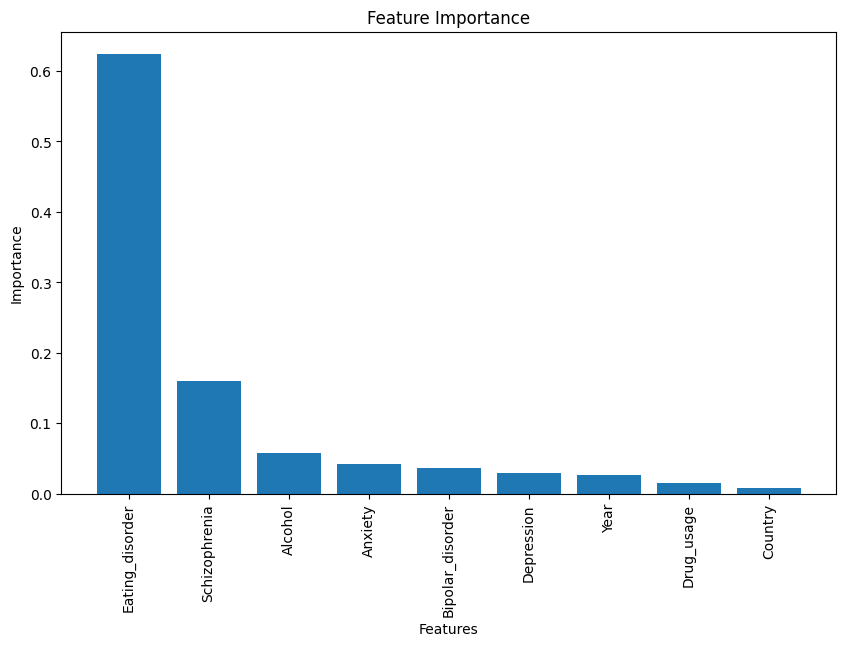

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
# Predictions and residuals
y_test_pred_lr = lr.predict(X_test)
residuals_lr = y_test - y_test_pred_lr

y_test_pred_rf = rf.predict(X_test)
residuals_rf = y_test - y_test_pred_rf


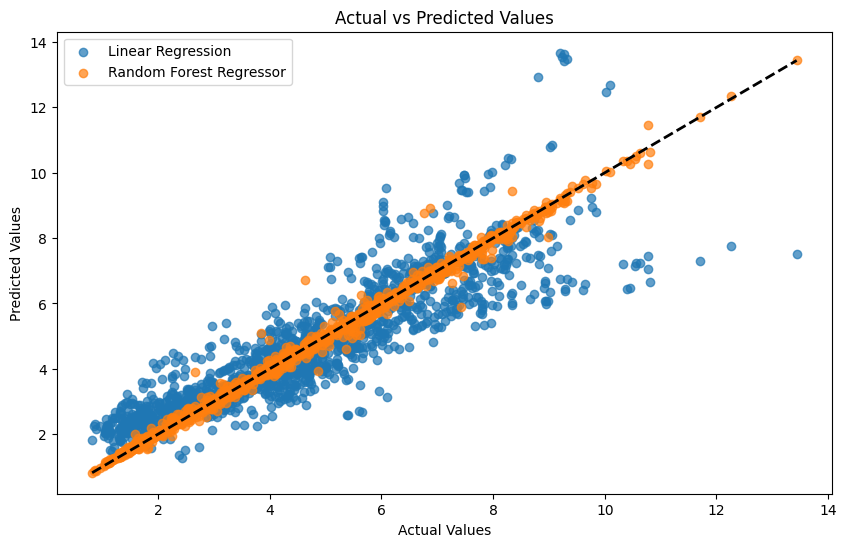

In [ ]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lr, label="Linear Regression", alpha=0.7)
plt.scatter(y_test, y_test_pred_rf, label="Random Forest Regressor", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

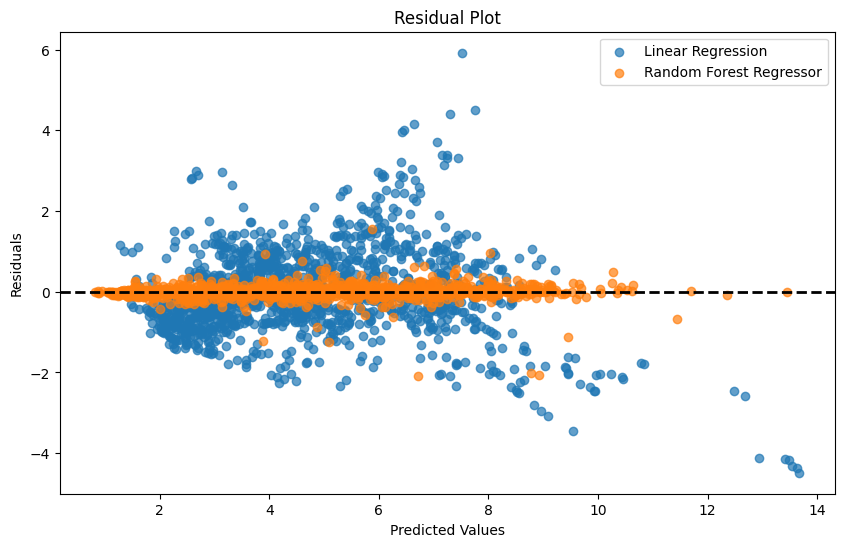

In [ ]:
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_lr, residuals_lr, label="Linear Regression", alpha=0.7)
plt.scatter(y_test_pred_rf, residuals_rf, label="Random Forest Regressor", alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

**Hyperparameter Tuning for Linear Regression**:

Although Linear Regression doesn't have many hyperparameters to tune, you can still use techniques like cross-validation to find the best hyperparameter values. You can create a parameter grid for the hyperparameters and use GridSearchCV to perform the search.
python


In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a new instance of Linear Regression
lr = LinearRegression()

# Hyperparameter tuning for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='r2', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
best_lr = grid_search_lr.best_estimator_

# Model evaluation for testing set (Linear Regression with best hyperparameters)
y_test_pred_lr_best = best_lr. predict(X_test)
mse_test_lr_best = mean_squared_error(y_test, y_test_pred_lr_best)
rmse_test_lr_best = np.sqrt(mse_test_lr_best)
r2_test_lr_best = r2_score(y_test, y_test_pred_lr_best)

print("\nLinear Regression (Best Hyperparameters) model performance for testing set:")
print("Best Hyperparameters: ", best_params_lr)
print("MSE: ", mse_test_lr_best)
print("RMSE: ", rmse_test_lr_best)
print("R2 score: ", r2_test_lr_best)



Linear Regression (Best Hyperparameters) model performance for testing set:
Best Hyperparameters:  {'copy_X': True, 'fit_intercept': True}
MSE:  1.1357545319272384
RMSE:  1.0657178481789813
R2 score:  0.7638974087055272


In [ ]:
import joblib

# Save the best model
joblib.dump(best_lr, 'best_linear_regression_model.pkl')


['best_linear_regression_model.pkl']

In [ ]:
# Load the saved model
loaded_model = joblib.load('best_linear_regression_model.pkl')

In [ ]:
# Use the loaded model for predictions
y_test_pred_loaded = loaded_model.predict(X_test)
mse_test_loaded = mean_squared_error(y_test, y_test_pred_loaded)
rmse_test_loaded = np.sqrt(mse_test_loaded)
r2_test_loaded = r2_score(y_test, y_test_pred_loaded)
print("\nLoaded Linear Regression model performance for testing set:")
print("MSE: ", mse_test_loaded)
print("RMSE: ", rmse_test_loaded)
print("R2 score: ", r2_test_loaded)


Loaded Linear Regression model performance for testing set:
MSE:  1.1357545319272384
RMSE:  1.0657178481789813
R2 score:  0.7638974087055272


**Model Comparison:**

You can compare the performance of multiple regression models using additional metrics such as Mean Absolute Error (MAE) and Explained Variance Score (EV). You can include other regression models like Ridge Regression, Lasso Regression, or Support Vector Regression (SVR) and evaluate their performance on the testing set.





In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, explained_variance_score


In [ ]:
# Create instances of additional regression models
ridge = Ridge()
lasso = Lasso()
svr = SVR()

In [ ]:
# Train the additional regression models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
svr.fit(X_train, y_train)


SVR()

In [ ]:
# Model evaluation for testing set (Ridge Regression)
y_test_pred_ridge = ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
ev_ridge = explained_variance_score(y_test, y_test_pred_ridge)

print("\nRidge Regression model performance for testing set:")
print("MAE: ", mae_ridge)
print("Explained Variance Score: ", ev_ridge)


Ridge Regression model performance for testing set:
MAE:  0.8076730489144393
Explained Variance Score:  0.7607223068517509


In [ ]:
# Model evaluation for testing set (Lasso Regression)
y_test_pred_lasso = lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
ev_lasso = explained_variance_score(y_test, y_test_pred_lasso)

print("\nLasso Regression model performance for testing set:")
print("MAE: ", mae_lasso)
print("Explained Variance Score: ", ev_lasso)



Lasso Regression model performance for testing set:
MAE:  1.4553281661132522
Explained Variance Score:  0.3197685666742731


In [ ]:
# Model evaluation for testing set (SVR)
y_test_pred_svr = svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_test_pred_svr)
ev_svr = explained_variance_score(y_test, y_test_pred_svr)

print("\nSVR model performance for testing set:")
print("MAE: ", mae_svr)
print("Explained Variance Score: ", ev_svr)


SVR model performance for testing set:
MAE:  1.7938879144354674
Explained Variance Score:  0.005178994980876039


**Residual Analysis** :

You can analyze the residuals in more detail by plotting a histogram and a Q-Q plot. This helps you assess whether the residuals follow a normal distribution.

In [ ]:
import scipy.stats as stats

# Calculate residuals for Linear Regression
residuals_lr = y_test - y_test_pred_lr_best

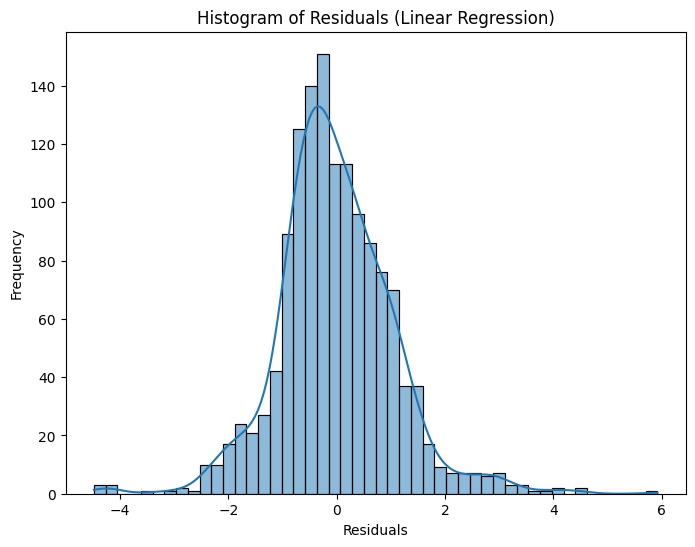

In [ ]:
# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_lr, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Linear Regression)")
plt.show()


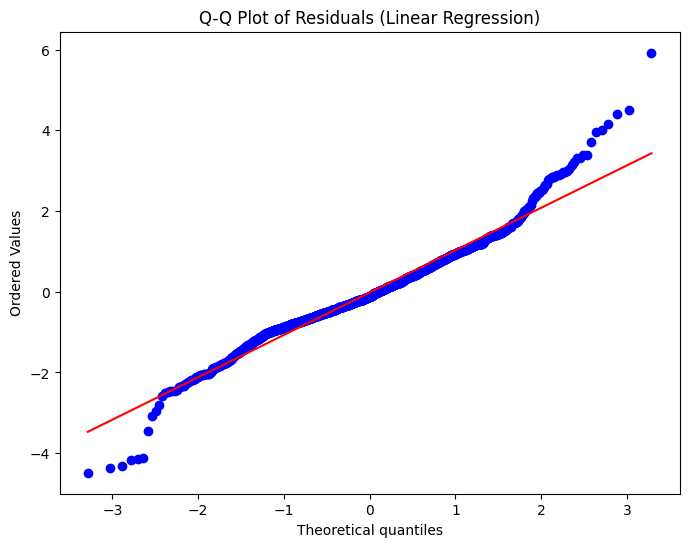

In [ ]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals_lr, plot=plt)
plt.title("Q-Q Plot of Residuals (Linear Regression)")
plt.show()

**Feature Selection using Recursive Feature Elimination (RFE):**

In [ ]:
from sklearn.feature_selection import RFE

# Create a new instance of Linear Regression
lr = LinearRegression()



In [ ]:
# Perform feature selection with RFE
rfe = RFE(estimator=lr, n_features_to_select=5)  # Select the top 5 features
rfe.fit(X_train, y_train)




RFE(estimator=LinearRegression(), n_features_to_select=5)

In [ ]:
# Get the selected feature indices
selected_feature_indices = rfe.support_

# Filter the dataset based on selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

**Cross-Validation using k-fold Cross-Validation:**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(lr, X_train_selected, y_train, cv=k, scoring='r2')

# Calculate the average cross-validation score
avg_cv_score = np.mean(cv_scores)
print("Average Cross-Validation Score:", avg_cv_score)


Average Cross-Validation Score: 0.7046555979145606
